### DEMODE04

# Non-IVP Non-Homogeneous Linear ODE Example
Solve
\begin{align*}
\dot{x_1} &= -1*x_1 - 0.5x_2 + 2\\
\dot{x_2} &= -0.5x_2 + 1
\end{align*} 

subject to

\begin{align*}
x_1(0) &=1\\
x_2(1) &=1\\
  t &\in [0, 10]
\end{align*}

## FORMULATION

In [1]:
from compecon import jacobian, ODE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Phase Diagram Title and Axis Labels

In [2]:
figtitle = 'ODE Phase Diagram'
xlabels  = ['$x_0$','$x_1$']

### Velocity Function

In [2]:
A = np.array([[-1, -0.5], [0, -0.5]])
b = np.array([2, 1])

def f(x, A, b):
    return ((A @ x).T + b).T    

### Boundary Conditions

In [3]:
bx = np.array([0,1])     # boundary variables
bt = np.array([0,1])     # boundary times
bv = np.array([1,1])     # boundary values

### Time Horizon

In [3]:
T = 10

### Closed-Form Solution 

In [3]:
def X(t):
    values = np.array([1 - np.exp(1/2-t) + np.exp((1-t)/2), 2-np.exp((1-t)/2)])
    return pd.DataFrame(values.T, index=t, columns=xlabels)

## SOLVE ODE ANALYTICALLY

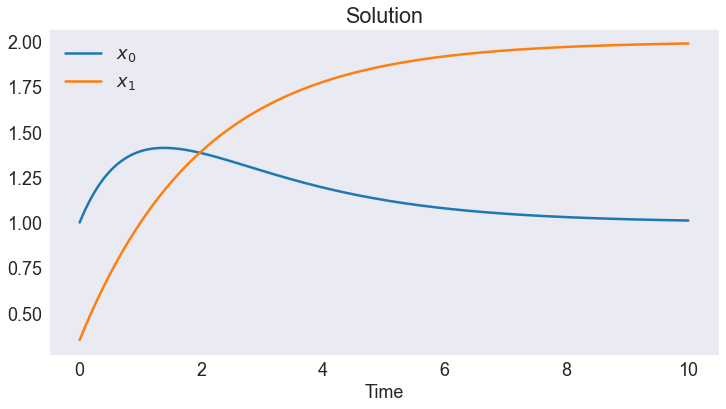

In [4]:
# Time Discretization
N = 200                 # number of time nodes
t = np.linspace(0,T,N)  # time nodes

# Plot Closed-Form Solution in Time Domain
fig, ax = plt.subplots()
X(t).plot(ax=ax)
ax.set(title='Solution', xlabel='Time')
ax.legend(xlabels)

## SOLVE ODE USING COLLOCATION METHOD

<AxesSubplot:>

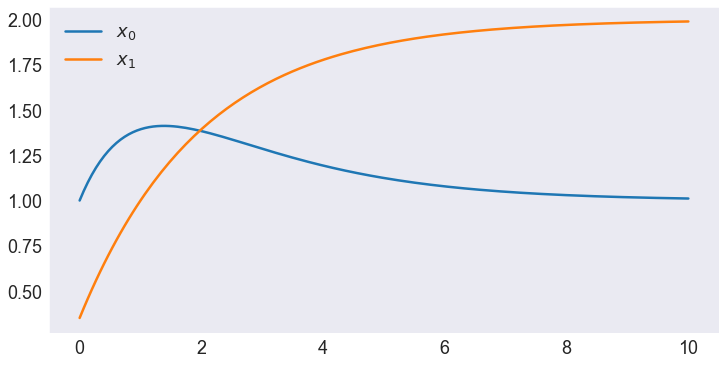

In [11]:
# Solve ODE
n = 15    # number of basis functions
#[x,t,res] = odecol(f,bv,T,n,bt,bx);

problem = ODE(f, T, bv, A, b)
problem.solve_collocation(n=n, bt=bt, bx=bx, nf=10)

problem.x.plot()

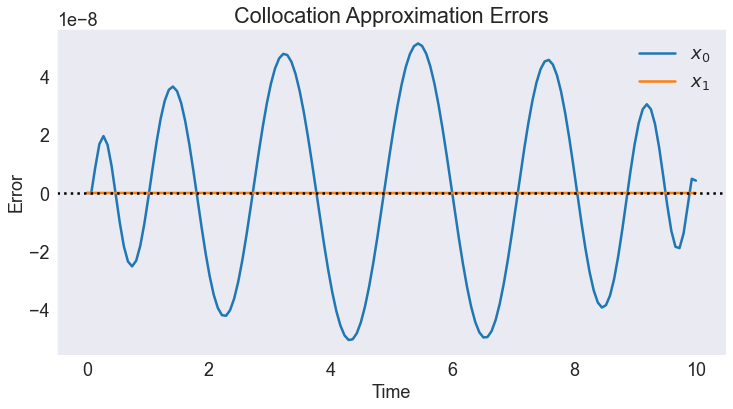

In [7]:
# Plot Collocation Approximation Errors
fig, ax = plt.subplots()

(problem.x - X(problem.x.index)).plot(ax=ax)
ax.axhline(0, color='black', ls=':')
ax.set(title='Collocation Approximation Errors',
       xlabel='Time',
       ylabel='Error');

Text(0.5, 0.98, 'Collocation Residuals')

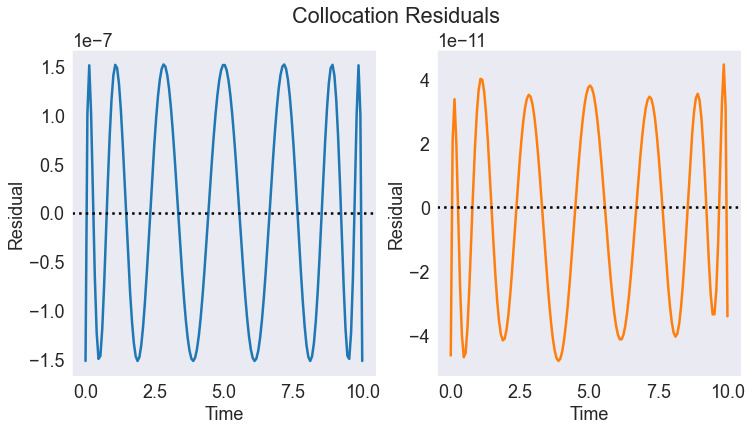

In [8]:
# Plot Residuals
fig, axs= plt.subplots(1,2)
problem.resid.plot(ax=axs, subplots=True, legend=False)

for ax in axs:
    ax.axhline(0, color='black', ls=':')
    ax.set(xlabel='Time', ylabel='Residual')

    
fig.suptitle('Collocation Residuals')


### STEADY-STATE

In [9]:
# Compute Steady State
xstst = - np.linalg.solve(A,b)
print('Steady State')
print(xstst)
print('Eigenvalues')
print(np.linalg.eigvals(jacobian(f, np.atleast_2d(xstst).T, A, b)))

Steady State
[1. 2.]
Eigenvalues
[-1.  -0.5]


### PHASE DIAGRAM

<AxesSubplot:title={'center':'ODE Phase Diagram'}, xlabel='$x_0$', ylabel='$x_1$'>

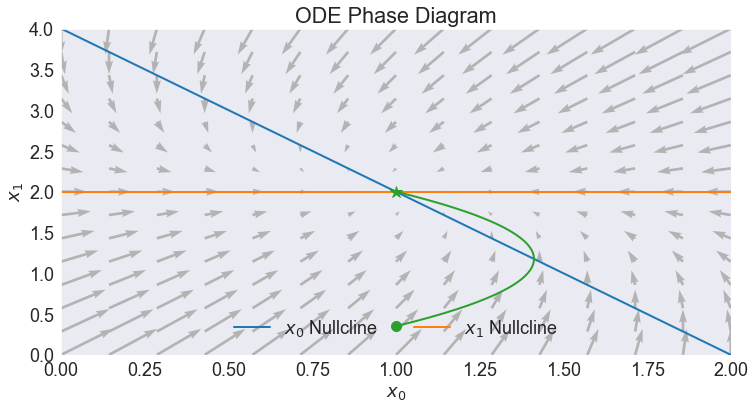

In [10]:
# Plotting Limits
x1lim = [0, 2]  # x1 plotting limits
x2lim = [0, 4]  # x2 plotting limits

# Compute Nullclines
x1 = np.linspace(*x1lim, 100)
xnulls = pd.DataFrame({'$x_0$ Nullcline': -(A[0,0]*x1 + b[0])/A[0,1],
                       '$x_1$ Nullcline': -(A[1,0]*x1 + b[1])/A[1,1]},
                     index = x1)

# Plot Phase Diagram
problem.phase(x1lim, x2lim, 
         xnulls=xnulls, 
         xstst=xstst,
         title='ODE Phase Diagram', xlabel='$x_0$', ylabel='$x_1$'
        )